In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


na_val=['NA', 'NaN', 'N/A', '']

data = pd.read_csv('/content/drive/My Drive/artworks_clean.csv',na_values=na_val)



In [ ]:
data

,Title,Artist,Nationality,BeginDate,EndDate,Gender,Date,Department
0,Dress MacLeod from Tartan Sets,Sarah Charlesworth,American,1947.0,2013.0,Female,1986,Prints & Illustrated Books
1,Duplicate of plate from folio 11 verso (supple...,Pablo Palazuelo,Spanish,1916.0,2007.0,Male,1978,Prints & Illustrated Books
2,Tailpiece (page 55) from SAGESSE,Maurice Denis,French,1870.0,1943.0,Male,1900,Prints & Illustrated Books
3,Headpiece (page 129) from LIVRET DE FOLASTRIES...,Aristide Maillol,French,1861.0,1944.0,Male,1934,Prints & Illustrated Books
4,97 rue du Bac,Eugène Atget,French,1857.0,1927.0,Male,1903,Photography
...,...,...,...,...,...,...,...,...
16720,Oval with Points,Henry Moore,British,1898.0,1986.0,Male,1968,Painting & Sculpture
16721,"Cementerio de la Ciudad Abierta, Ritoque, Chile",Juan Baixas,Chilean,1942.0,NaN,Male,1975,Architecture & Design
16722,The Catboat,Edward Hopper,American,1882.0,1967.0,Male,1922,Prints & Illustrated Books
16723,Dognat' i peregnat' v tekhniko-ekonomicheskom ...,Unknown,Nationality Unknown,NaN,NaN,Gender Unknown/Other,1931,Prints & Illustrated Books


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16725 entries, 0 to 16724
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        16724 non-null  object 
 1   Artist       16725 non-null  object 
 2   Nationality  16725 non-null  object 
 3   BeginDate    15786 non-null  float64
 4   EndDate      10474 non-null  float64
 5   Gender       16725 non-null  object 
 6   Date         16725 non-null  int64  
 7   Department   16725 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.0+ MB


In [ ]:
# Clean columns names
data.columns = data.columns.str.lower()
data.rename(columns={'begindate': 'birthyear', 'enddate': 'deathyear', 'date': 'creationyear'}, inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16725 entries, 0 to 16724
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         16724 non-null  object 
 1   artist        16725 non-null  object 
 2   nationality   16725 non-null  object 
 3   birthyear     15786 non-null  float64
 4   deathyear     10474 non-null  float64
 5   gender        16725 non-null  object 
 6   creationyear  16725 non-null  int64  
 7   department    16725 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.0+ MB


# Examining most creative age group

In [ ]:
#checking if year columns are numeric

In [ ]:
def not_num_checker(col):
    not_numeric=~(pd.to_numeric(data[col], errors='coerce').notna())
    return data[col][not_numeric].unique(), len(data[col][not_numeric].unique())

In [ ]:
not_num_checker('birthyear')

(array([nan]), 1)

In [ ]:
not_num_checker('deathyear')

(array([nan]), 1)

In [ ]:
not_num_checker('creationyear')

(array([], dtype=int64), 0)

In [ ]:
#drop na in birthyear
data = data.dropna(subset=['birthyear'])

In [ ]:
data['artistageatcreation'] = data.loc[:,'creationyear'].astype(int) - data.loc[:,'birthyear'].astype(int)


In [ ]:
data.head()

,title,artist,nationality,birthyear,deathyear,gender,creationyear,department,artistageatcreation
0,Dress MacLeod from Tartan Sets,Sarah Charlesworth,American,1947.0,2013.0,Female,1986,Prints & Illustrated Books,39
1,Duplicate of plate from folio 11 verso (supple...,Pablo Palazuelo,Spanish,1916.0,2007.0,Male,1978,Prints & Illustrated Books,62
2,Tailpiece (page 55) from SAGESSE,Maurice Denis,French,1870.0,1943.0,Male,1900,Prints & Illustrated Books,30
3,Headpiece (page 129) from LIVRET DE FOLASTRIES...,Aristide Maillol,French,1861.0,1944.0,Male,1934,Prints & Illustrated Books,73
4,97 rue du Bac,Eugène Atget,French,1857.0,1927.0,Male,1903,Photography,46


In [ ]:
# checking for data quality issues
data['artistageatcreation'][data['artistageatcreation']<10].unique()

array([  2,   1,  -1,   8,   4,   7,  -2,   5,   3,   6,   9, -26,  -4,
         0])

In [ ]:
# checking for data quality issues
data['artistageatcreation'][data['artistageatcreation']>100].unique()

array([108, 102, 114])

In [ ]:

# due to this issues only ages from 10 and above would be considered

In [ ]:
data=data[data['artistageatcreation']>10]
data

,title,artist,nationality,birthyear,deathyear,gender,creationyear,department,artistageatcreation
0,Dress MacLeod from Tartan Sets,Sarah Charlesworth,American,1947.0,2013.0,Female,1986,Prints & Illustrated Books,39
1,Duplicate of plate from folio 11 verso (supple...,Pablo Palazuelo,Spanish,1916.0,2007.0,Male,1978,Prints & Illustrated Books,62
2,Tailpiece (page 55) from SAGESSE,Maurice Denis,French,1870.0,1943.0,Male,1900,Prints & Illustrated Books,30
3,Headpiece (page 129) from LIVRET DE FOLASTRIES...,Aristide Maillol,French,1861.0,1944.0,Male,1934,Prints & Illustrated Books,73
4,97 rue du Bac,Eugène Atget,French,1857.0,1927.0,Male,1903,Photography,46
...,...,...,...,...,...,...,...,...,...
16719,"Picasso Sculpture (paper, skull)",Brassaï (Gyula Halász),French,1899.0,1984.0,Male,1943,Photography,44
16720,Oval with Points,Henry Moore,British,1898.0,1986.0,Male,1968,Painting & Sculpture,70
16721,"Cementerio de la Ciudad Abierta, Ritoque, Chile",Juan Baixas,Chilean,1942.0,NaN,Male,1975,Architecture & Design,33
16722,The Catboat,Edward Hopper,American,1882.0,1967.0,Male,1922,Prints & Illustrated Books,40


In [ ]:
data['decades'] = data.loc[:,'artistageatcreation'].copy().astype(str).str[:-1] + '0s'
data.head()


,title,artist,nationality,birthyear,deathyear,gender,creationyear,department,artistageatcreation,decades
0,Dress MacLeod from Tartan Sets,Sarah Charlesworth,American,1947.0,2013.0,Female,1986,Prints & Illustrated Books,39,30s
1,Duplicate of plate from folio 11 verso (supple...,Pablo Palazuelo,Spanish,1916.0,2007.0,Male,1978,Prints & Illustrated Books,62,60s
2,Tailpiece (page 55) from SAGESSE,Maurice Denis,French,1870.0,1943.0,Male,1900,Prints & Illustrated Books,30,30s
3,Headpiece (page 129) from LIVRET DE FOLASTRIES...,Aristide Maillol,French,1861.0,1944.0,Male,1934,Prints & Illustrated Books,73,70s
4,97 rue du Bac,Eugène Atget,French,1857.0,1927.0,Male,1903,Photography,46,40s


In [ ]:
most_creative_year=data['decades'].value_counts()
desired_order = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s']
most_creative_year= most_creative_year.reindex(desired_order)
most_creative_year

10s       81
20s     1886
30s     4722
40s     4081
50s     2434
60s     1357
70s      559
80s      364
90s      253
100s       3
Name: decades, dtype: int64

<Axes: >

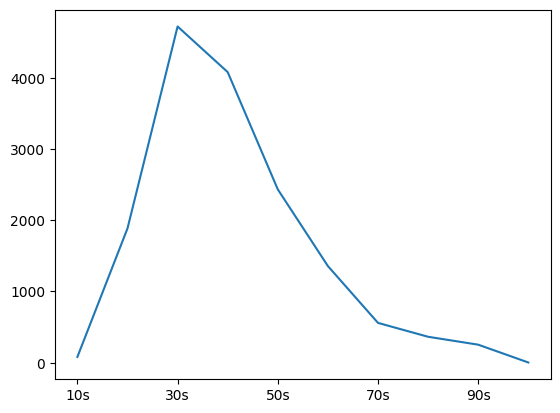

In [ ]:
most_creative_year.plot()

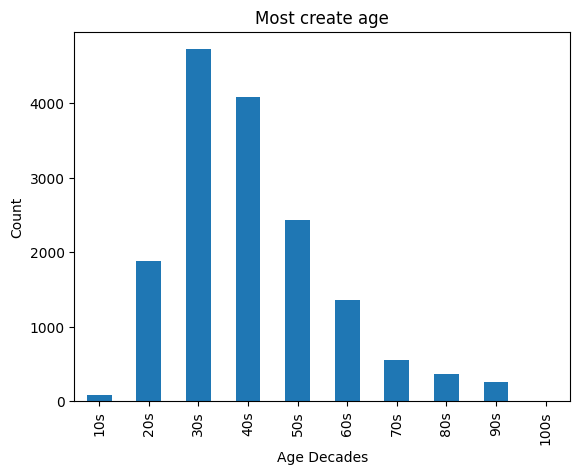

In [ ]:
most_creative_year.plot(kind='bar')

# Add labels and title
plt.xlabel('Age Decades')
plt.ylabel('Count')
plt.title('Most create age')

# Show the plot
plt.show()

# Examining most creative artist

In [ ]:
data.head()

,title,artist,nationality,birthyear,deathyear,gender,creationyear,department,artistageatcreation,decades
0,Dress MacLeod from Tartan Sets,Sarah Charlesworth,American,1947.0,2013.0,Female,1986,Prints & Illustrated Books,39,30s
1,Duplicate of plate from folio 11 verso (supple...,Pablo Palazuelo,Spanish,1916.0,2007.0,Male,1978,Prints & Illustrated Books,62,60s
2,Tailpiece (page 55) from SAGESSE,Maurice Denis,French,1870.0,1943.0,Male,1900,Prints & Illustrated Books,30,30s
3,Headpiece (page 129) from LIVRET DE FOLASTRIES...,Aristide Maillol,French,1861.0,1944.0,Male,1934,Prints & Illustrated Books,73,70s
4,97 rue du Bac,Eugène Atget,French,1857.0,1927.0,Male,1903,Photography,46,40s


In [ ]:
most_creative_artist=data['artist'].value_counts()[:11]
most_creative_artist

Eugène Atget                705
Louise Bourgeois            495
Ludwig Mies van der Rohe    318
Jean Dubuffet               206
Lee Friedlander             180
Marc Chagall                173
Pierre Bonnard              129
Henri Matisse               129
Lilly Reich                 118
Frank Lloyd Wright          112
August Sander               105
Name: artist, dtype: int64

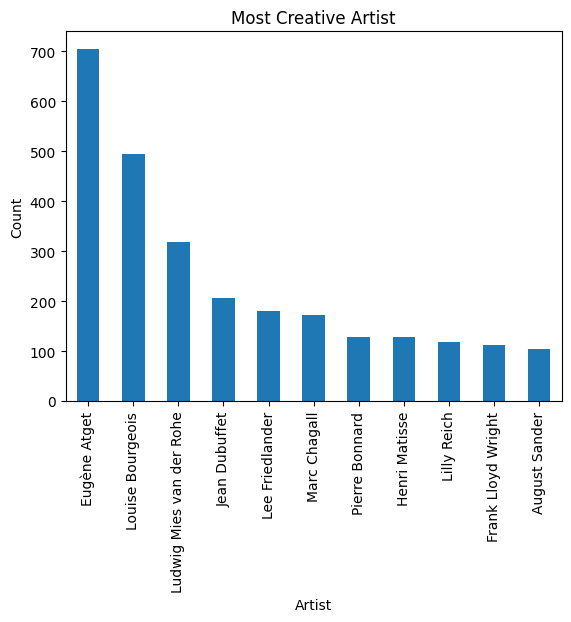

In [ ]:
most_creative_artist.plot(kind='bar')

# Add labels and title
plt.xlabel('Artist')
plt.ylabel('Count')
plt.title('Most Creative Artist')

# Show the plot
plt.show()